 Press Run: Enter a stock or crypto ticker symbol (from yahoo finance)
 
 peroid is : 1m,2m,5m,15m,30m,90m,1h,1d,5d,1wk
 

In [1]:
import yfinance as yf
stock_ticker = input("Enter a Stock Symbol:")
df = yf.download(tickers=stock_ticker, period = '1wk', interval = '1m')

Enter a Stock Symbol:tsla
[*********************100%***********************]  1 of 1 completed


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import torch

import datetime as dt
import pandas_datareader as pdr

import yfinance as yf



from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential 
from keras.layers import CuDNNLSTM

data_history = []

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [3]:
#stock_ticker = input("Enter a Stock Symbol:")
#df = yf.download(tickers=stock_ticker, period = '1wk', interval = '1m')

In [4]:
print(stock_ticker)

tsla


In [5]:
df.head()
df.shape

(1720, 6)

In [6]:
shift_days = 1  # IMPORTANT 
shift_steps = shift_days * 24  # predicts 24 hours into the future? if want 7 days then 24 x 7 
df_targets = df.shift(-shift_steps)

In [7]:
df.head(shift_steps + 5)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-05-31 09:30:00-04:00,775.727173,775.727173,775.727173,775.727173,775.727173,1649335
2022-05-31 09:31:00-04:00,775.909973,778.093628,773.840027,774.469971,774.469971,237359
2022-05-31 09:32:00-04:00,774.349976,774.945984,769.369995,769.978577,769.978577,242360
2022-05-31 09:33:00-04:00,769.960022,770.249878,766.500000,766.599976,766.599976,232527
2022-05-31 09:34:00-04:00,766.750000,766.750000,765.400024,765.549988,765.549988,186333
2022-05-31 09:35:00-04:00,768.500000,768.590027,765.250000,765.315979,765.315979,161861
2022-05-31 09:36:00-04:00,765.500000,765.965820,765.150024,765.150024,765.150024,133952
2022-05-31 09:37:00-04:00,764.000000,765.000000,760.150024,760.539978,760.539978,283295
2022-05-31 09:38:00-04:00,756.000000,756.000000,753.289978,753.650024,753.650024,380047


In [8]:
df_targets.head(5)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-05-31 09:30:00-04:00,748.000000,748.210022,746.769714,747.320007,747.320007,85749.0
2022-05-31 09:31:00-04:00,748.250000,751.940002,747.919983,751.630005,751.630005,103955.0
2022-05-31 09:32:00-04:00,752.750000,755.640015,752.200012,754.811707,754.811707,152865.0
2022-05-31 09:33:00-04:00,752.796997,753.380005,751.164429,752.112122,752.112122,94508.0
2022-05-31 09:34:00-04:00,752.000000,752.260010,751.320007,751.320007,751.320007,73897.0


In [9]:
df_targets.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-06 12:07:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06 12:08:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06 12:09:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06 12:10:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-06 12:11:26-04:00,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
x_data = df.values[0:-shift_steps] #input singals 

In [11]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (1696, 6)


In [12]:
y_data = df_targets.values[:-shift_steps] #output/target singals
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (1696, 6)


In [13]:
#number of observations
num_data = len(x_data) 
num_data

1696

In [14]:
#This is the fraction of the data-set that will be used for the training-set:
train_split = 0.9

In [15]:
#This is the number of observations in the training-set:
num_train = int(train_split * num_data)
num_train

1526

In [16]:
#This is the number of observations in the test-set:
num_test = num_data - num_train
num_test

170

In [17]:
#These are the input-signals for the training- and test-sets:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

1696

In [18]:
#These are the output-signals for the training- and test-sets:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

1696

In [19]:
num_x_signals = x_data.shape[1] #This is the number of input-signals:  #IMPORTANT ? 
num_x_signals

6

In [20]:
num_y_signals = y_data.shape[1] #This is the number of output-signals: #IMPORTANT ? 
num_y_signals

6

In [21]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 700.25341796875
Max: 2787893.0


In [22]:
x_scaler = MinMaxScaler()

In [23]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [24]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000009


In [25]:
x_test_scaled = x_scaler.transform(x_test)

In [26]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [27]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(1526, 6)
(1526, 6)


In [28]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)


batch_size = 256
sequence_length = 24 * 7 * 1

In [29]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=2 * 7 * 8)

In [30]:
x_batch, y_batch = next(generator)

In [31]:
print(x_batch.shape)
print(y_batch.shape)

(256, 112, 6)
(256, 112, 6)


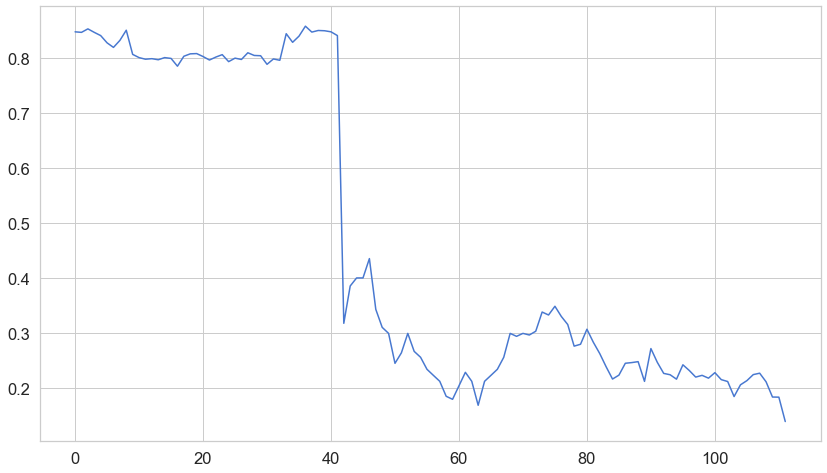

In [32]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

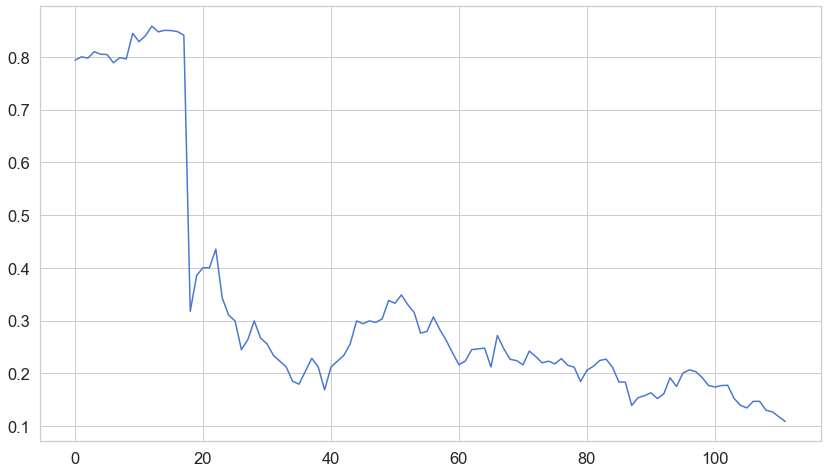

In [33]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [34]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [35]:
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [36]:
x_train_scaled.shape
np.isnan(x_train_scaled).any()
#x_train_scaled = x_train_scaled.reshape(-1, 1)  # added to try later for all?? 

False

In [37]:
x_test_scaled.shape
np.isnan(x_test_scaled).any()

False

In [38]:
y_train_scaled.shape
np.isnan(y_train_scaled).any()

False

In [39]:
y_test_scaled.shape
np.isnan(y_test_scaled.shape).any()

False

In [40]:
scaler = MinMaxScaler()
close_price = df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price) #Fix this

In [41]:
SEQ_LEN = 100
DROPOUT = 0.2
DROPOUT2 = 0.4
DROPOUT3 = 0.6
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(num_x_signals, x_data.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT2))

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True)))
model.add(Dropout(rate=DROPOUT3))
#model.add(GRU(units=512,
#              return_sequences=True,
#              input_shape=(None, num_x_signals,)))


#model.add(Dense(units=1))
model.add(Dense(num_y_signals, activation='sigmoid'))
#model.add(Activation('linear'))

In [42]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)






    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [43]:
warmup_steps = 50

In [44]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

In [45]:
BATCH_SIZE = 64



In [46]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [47]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [48]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 6, 198)            84744     
_________________________________________________________________
dropout (Dropout)            (None, 6, 198)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 6, 396)            630432    
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 396)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 6, 198)            393624    
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 198)            0         
_________________________________________________________________
dense (Dense)                (None, 6, 6)              1

In [49]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [50]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [51]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [52]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [53]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [54]:
%%time
history = model.fit(x=generator,
          epochs=20,
          steps_per_epoch=100,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 23s 172ms/step - loss: 0.0124 - val_loss: 0.0088

Epoch 00001: val_loss improved from inf to 0.00885, saving model to 23_checkpoint.keras
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0035 - val_loss: 0.0033

Epoch 00002: val_loss improved from 0.00885 to 0.00332, saving model to 23_checkpoint.keras
Epoch 3/20
100/100 [==============================] - 16s 165ms/step - loss: 0.0025 - val_loss: 0.0038

Epoch 00003: val_loss did not improve from 0.00332

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0022 - val_loss: 0.0034

Epoch 00004: val_loss did not improve from 0.00332

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 5/20
100/100 [==============================] - 16s 164ms/step - loss: 0.0022 - val_loss: 0.0034

Epoch 00005: val_loss did not improve from 0.00332

In [55]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [56]:
result = model.evaluate

result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 26ms/step - loss: 0.0040


In [57]:
print("loss (test-set):", result)

loss (test-set): 0.004031329415738583
loss (test-set): 0.004031329415738583


In [58]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [55]:
def generate_predictions(start_idx, length=100, train=False,forecast = False):
    
    
    if forecast:
        x = x_test_scaled.copy()
    
    elif train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    
    if forecast:
        x = x[start_idx:end_idx]
        
    else:
        x = x[start_idx:end_idx]
        y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    pred_dict = {i: None for i in target_names} 
    
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        pred_dict[target_names[signal]] = signal_pred
        
    return pred_dict

In [56]:
target_names = ['x','y','z']

pred_dict = generate_predictions(start_idx=0, length=10000, train=True, forecast = False)

In [57]:
from matplotlib.animation import FuncAnimation

In [58]:
def plot_comparison(start_idx, length=100, train=False,forecast = False):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if forecast:
        x = x_test_scaled.copy()
    
    elif train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    
    if forecast:
        x = x[start_idx:end_idx]
        
    else:
        x = x[start_idx:end_idx]
        y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    pred_dict = {i: None for i in target_names} 
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        pred_dict[target_names[signal]] = signal_pred
        if forecast == False:
            # Get the true output-signal from the data-set.
            signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        if forecast == False:
       
         fig, ax = plt.subplots()    
            # Plot and compare the two signals.
         plt.plot(signal_true, label='true',marker='.')
        
        plt.plot(signal_pred, label='pred')
         # plt.plot(signal_true, label='true',marker=r'$\uparrow$')
         # plt.plot(signal_pred, label='pred',marker='$\downarrow$')

        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        
        plt.legend()
        plt.show()
        
        
        


    def plot_utm():
        sbpt_1 = fig.add_subplot() 
        content.plot (color = '#3BB9FF', ax = sbpt_1)
        display.draw_idle()
    
    #def plot_tm():
      #  sbpt_2 = fig.add_subplot()
      #  shp_TM.plot(color = '#4CC417', ax = sbpt_2)
       # display.draw_idle()
    
   # def plot_om():
     #   sbpt_3 = fig.add_subplot()
      #  shp_TMOM.plot(color = '#FFA62F', ax = sbpt_3)
      
    #ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
        #ax0.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Close','SMA_5','SMA_15']])
        #ax0.set_facecolor('ghostwhite')
        #ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
        #plt.title("Stock Price, Slow and Fast Moving Average", fontsize = 20)
        
       # ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
       # ax1.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['SMA_ratio']], color = 'blue')
       # ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
      #  ax1.set_facecolor('silver')
       # plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
       # plt.show()
        
        
       # ax2 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
       # ax2.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['MACD']], color = 'yellow')
       # ax2.legend(['MACD'],ncol=3, loc = 'upper left', fontsize = 12)
       # ax2.set_facecolor('silver')
       # plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
       # plt.show()


       # ax3 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
       # ax3.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['RC']], color = 'green')
      #  ax3.legend(['RC'],ncol=3, loc = 'upper left', fontsize = 12)
       # ax3.set_facecolor('silver')
      #  plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
      #  plt.show()

       # ax4 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
       # ax4.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['RSI_5']], color = 'blue')
       # ax4.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['RSI_15']], color = 'red')
       # first_legend = ax4.legend(['RSI_15'],ncol=3, loc = 'upper left', fontsize = 12, facecolor='red',edgecolor = 'red')
       # ax = plt.gca().add_artist(first_legend) # Add the legend manually to the current Axes.
       # ax4.legend(['RSI_5'],ncol=3, loc = 'center', fontsize = 12, )
       # ax4.set_facecolor('silver')
       # plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
       # plt.show()
        
       # ax5 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
       # ax5.plot(all_data[all_data.symbol=='TSLA'].loc[start:end,['Volume']], color = 'Brown')
       # ax5.legend(['Volume'],ncol=3, loc = 'upper left', fontsize = 12)
       # ax5.set_facecolor('silver')
       # plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
       # plt.show()

        
        ani = FuncAnimation(fig, signal_true, blit=True)
        return signal

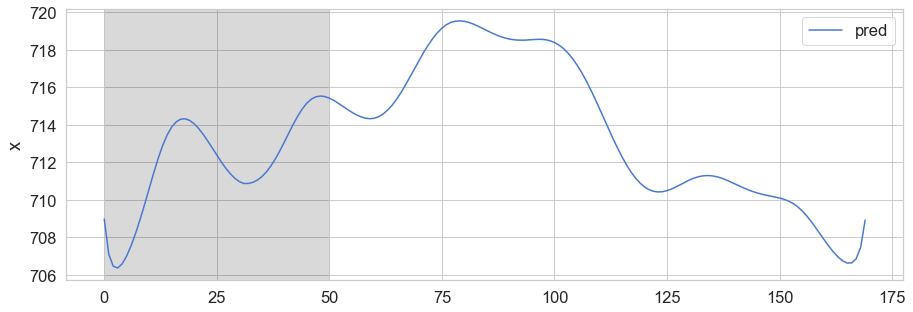

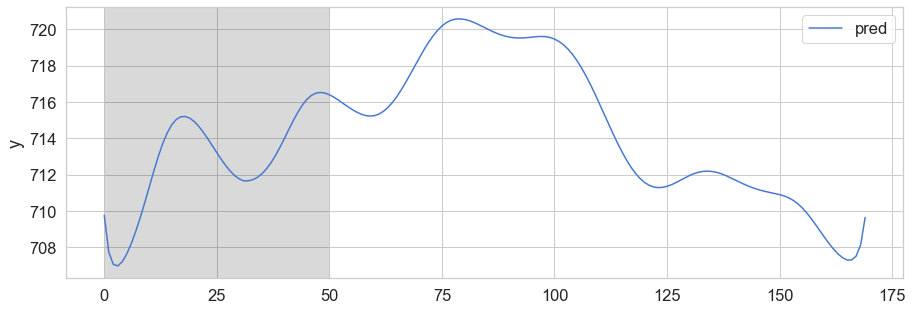

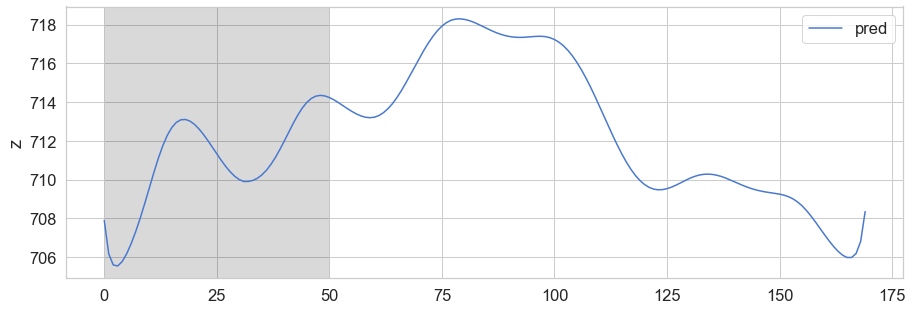

In [59]:
plot_comparison(start_idx=0, length=10000, train=True, forecast = True)

<Figure size 1080x360 with 0 Axes>

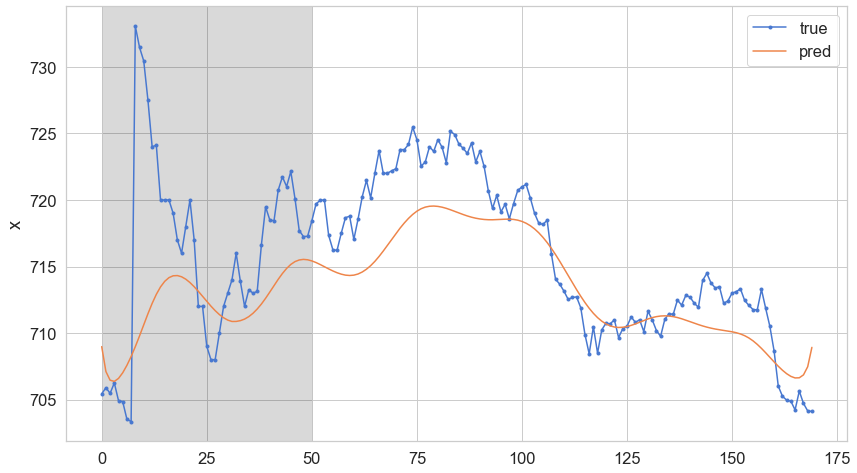

<Figure size 1080x360 with 0 Axes>

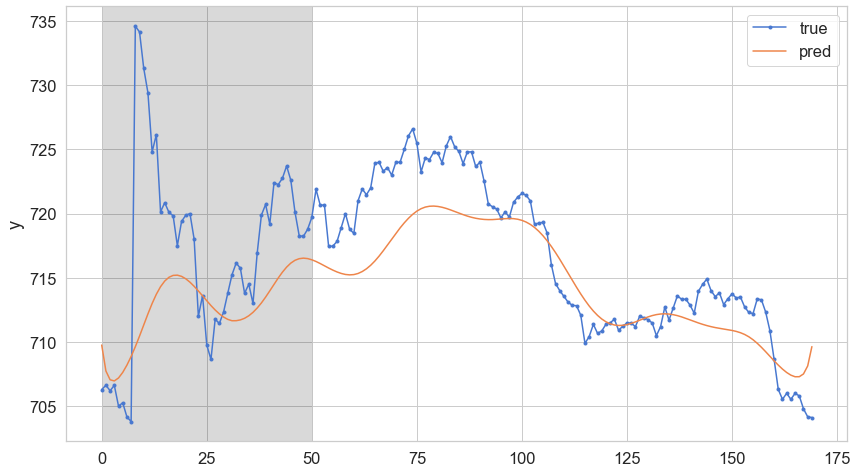

<Figure size 1080x360 with 0 Axes>

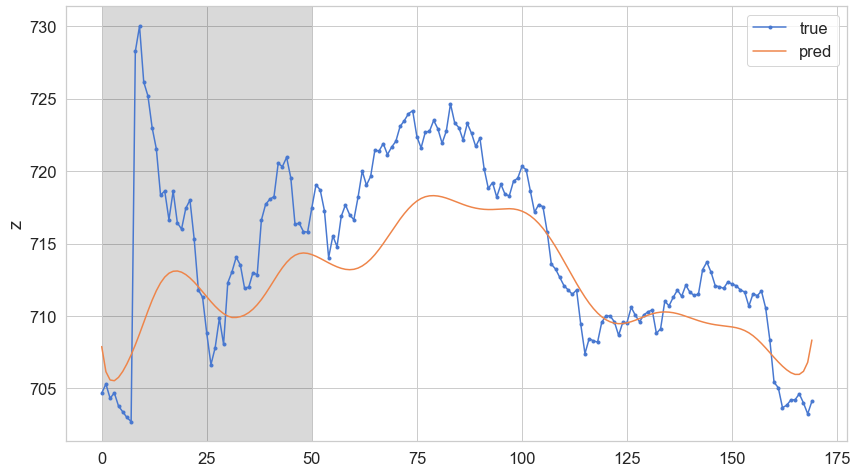

In [60]:
plot_comparison(start_idx=0, length=10000, train=False, forecast = False)

<Figure size 1080x360 with 0 Axes>

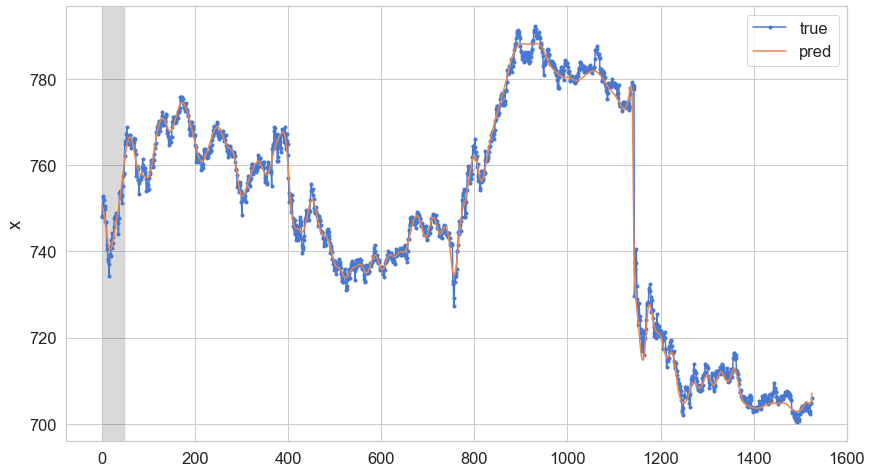

<Figure size 1080x360 with 0 Axes>

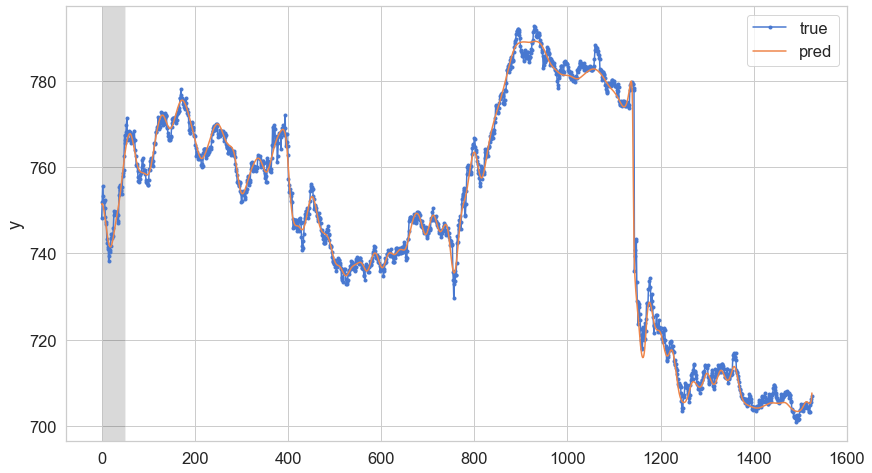

<Figure size 1080x360 with 0 Axes>

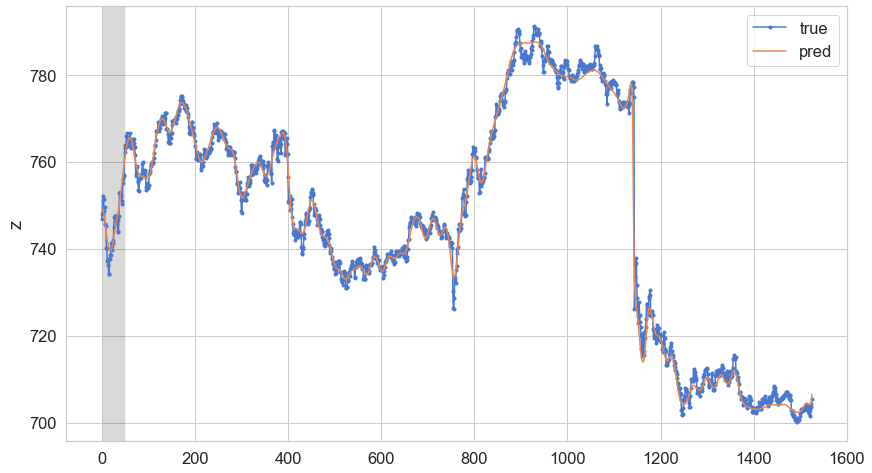

In [61]:
plot_comparison(start_idx=0, length=10000, train=True, forecast = False)

In [62]:
#plot_comparison(start_idx=0, length=10000, train=True, forecast = True)

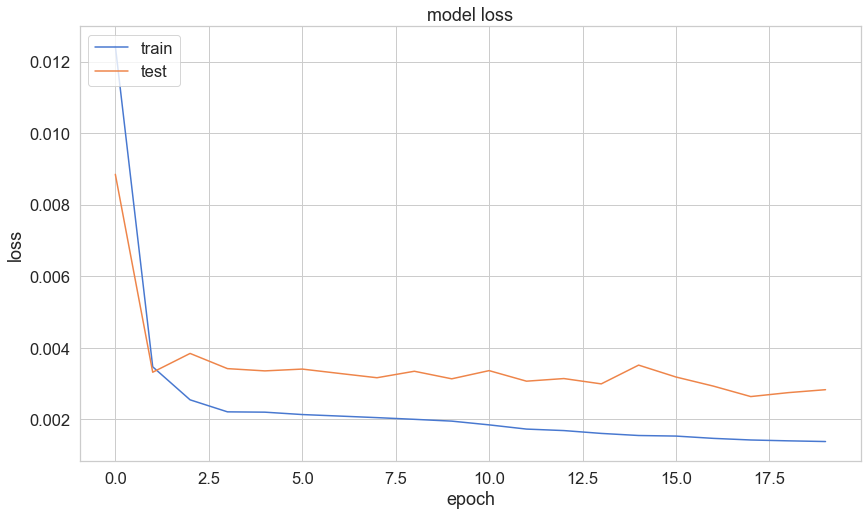

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


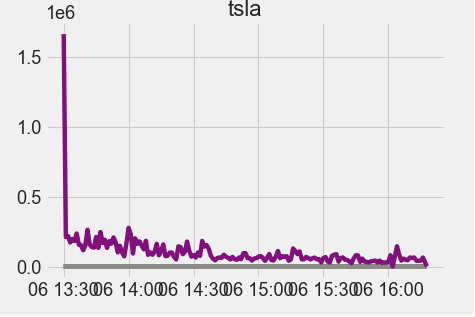

In [64]:
from matplotlib.animation import FuncAnimation
from matplotlib import style
%matplotlib nbagg
style.use('fivethirtyeight')
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)


def animate(i):
    df = yf.download(tickers=stock_ticker, period = '24h', interval = '1m')
    ys = df.iloc[:,0].values
    ys1= df.iloc[:,1].values
    print(ys)
    
    if len(ys)>=120:
        ys = df.iloc[-120:0].values
        ys1 = df.iloc[-120:1].values
        
        xs=list(range(1, len(ys)+1))
        ax1.clear()
        ax1.plot(xs,ys)
        ax1.plot(xs,ys1)
        ax1.plot(df)
        
        ax1.set_title(stock_ticker)
        ax1.legendd(['Actual', Forceast], loc = 'lower right')
        
       # plt.rcParams["animation.html"] = "html5"  
        
        
        return 

ani = FuncAnimation(fig,animate,interval=500)
plt.tight_layout()
#anim.save()
plt.show()


    


In [65]:
#https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb
#https://www.kaggle.com/code/mycorino/rnn-forex-v2

In [66]:
def return_pred(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    y_pred_rescaled[:,0] = np.log(y_pred_rescaled[:,0])/10
    y_tc = y_true[:,0]
    y_tc = np.log(y_true[:,0])/10
    
    result = pd.DataFrame({'Close_pred':y_pred_rescaled[:,0],'Close_true':y_tc})
    result['rmse'] = np.sqrt((result['Close_pred'] - result['Close_true'])*
                              (result['Close_pred'] - result['Close_true']))
    
    result = result.tail(len(result)-200) #giving at least 50 learning steps to the model
    return(result)

In [67]:
result = return_pred(start_idx = 0, length=10000, train=True) #should be train = false but get nothing
result.head()

,Close_pred,Close_true,rmse
200,0.664052,0.664263,0.000211
201,0.663993,0.663955,0.000038
202,0.663935,0.663879,0.000055
203,0.663877,0.663437,0.000439
204,0.663819,0.663626,0.000193


In [68]:
result.describe()

,Close_pred,Close_true,rmse
count,1326.000000,1326.000000,1.326000e+03
mean,0.661332,0.661394,2.037153e-04
std,0.003652,0.003628,2.457362e-04
min,0.655520,0.655184,2.406873e-07
25%,0.657711,0.658004,6.864541e-05
50%,0.661412,0.661485,1.549077e-04
75%,0.664272,0.664268,2.817385e-04
max,0.666988,0.667492,5.051497e-03


In [69]:
rmse = result.describe()['rmse'][1]
data_history.append([rmse,loss_test_set,shift_mn,epochs,steps_per_epoch,batch_size,sequence_length])
df = pd.DataFrame(data_history,columns=['rmse','trainScore','shift_mn',
                                        'epochs','steps_per_epoch','batch_size','sequence_length'])
df

NameError: name 'loss_test_set' is not defined

In [70]:
from pandas.tseries.offsets import DateOffset

add_dates = [df_test.index[-1] + DateOffset(hours = x) for x in range(0,newrobot.predicition_window)]
future_dates = pd.DataFrame(index=add_dates[1:],columns = df_test.columns)

df_pred = pd.DataFrame(y_pred_rescaled.reshape(-1,1), index=df_test.index, columns=['Predictions'])

df_proj = pd.concat([df_test, df_pred])
df_proj = df_proj.append(future_dates)
print()

NameError: name 'newrobot' is not defined

<IPython.core.display.Javascript object>


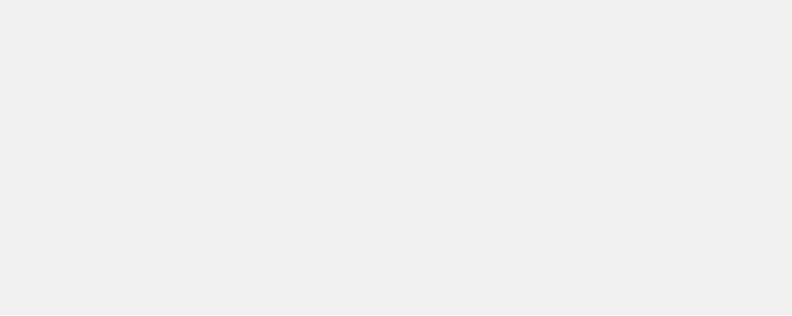

NameError: name 'df_proj' is not defined

In [71]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['close'])
plt.plot(df_proj.index,df_proj['Predictions'].shift(newrobot.predicition_window))